# XGBoost

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
teledf = pd.read_csv('data/teledf_final.csv', index_col = 0)
teledf.head()

,Area code_408,Area code_415,Area code_510,Voice mail plan,Churn,International plan,Customer service calls,Total day minutes,Total day charge,Number vmail messages,Total day minutes.1,Total day calls,Total day charge.1,Total eve minutes,Total eve charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls.1
0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,265.1,45.07,25.0,265.1,110.0,45.07,197.4,16.78,10.0,3.0,2.70,1.0
1,0.0,1.0,0.0,1.0,0.0,0.0,1.0,161.6,27.47,26.0,161.6,123.0,27.47,195.5,16.62,13.7,3.0,3.70,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,243.4,41.38,0.0,243.4,114.0,41.38,121.2,10.30,12.2,5.0,3.29,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,2.0,299.4,50.90,0.0,299.4,71.0,50.90,61.9,5.26,6.6,7.0,1.78,2.0
4,0.0,1.0,0.0,0.0,0.0,1.0,3.0,166.7,28.34,0.0,166.7,113.0,28.34,148.3,12.61,10.1,3.0,2.73,3.0


In [3]:
from sklearn.model_selection import train_test_split

X = teledf.drop(columns = 'Churn')
y = teledf['Churn']

X_rest, X_test, y_rest, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train, X_val, y_train, y_val = train_test_split(X_rest, y_rest, test_size = 0.2, random_state = 42)

In [6]:
from xgboost import XGBClassifier

In [15]:
xgb_model = XGBClassifier(random_state = 42)

xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [16]:
xgb_model.score(X_train,y_train), xgb_model.score(X_test, y_test)

(0.9671669793621013, 0.952023988005997)

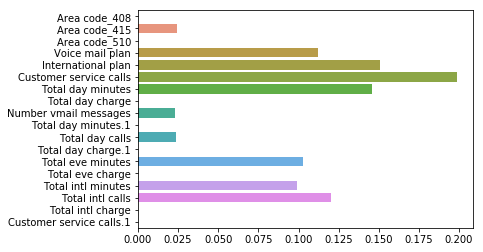

In [17]:
sns.barplot(y=X.columns,x=xgb_model.feature_importances_)

In [13]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

Text(0.5, 1.0, 'Confusion Matrix for Decision Tree Classifier')

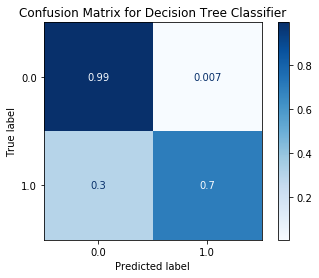

In [18]:
plot_confusion_matrix(xgb_model, 
                      X_test,
                      y_test,
                      cmap= 'Blues', 
                      normalize = 'true')
plt.title('Confusion Matrix for Decision Tree Classifier')

Results of XGBoost are the best of the tested models (marginally better than normal gradient boosting).
Optimization will be conducted to finalize the XGBoost model, with the aim of decreasing false negative classifications (recall).